In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('PROCESSED_SCALED.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217517 entries, 0 to 217516
Data columns (total 11 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   DeviceName                                          217517 non-null  object 
 1   eth.src_14:cc:20:51:33:ea                           217517 non-null  float64
 2   eth.src_resolved_14:cc:20:51:33:ea                  217517 non-null  float64
 3   eth.src_oui                                         217517 non-null  float64
 4   eth.src_oui_resolved_Tp-Link Technologies Co.,Ltd.  217517 non-null  float64
 5   eth.addr_14:cc:20:51:33:ea                          217517 non-null  float64
 6   tcp.options_timestamp_tsval                         217517 non-null  float64
 7   eth.src_30:8c:fb:2f:e4:b2                           217517 non-null  float64
 8   eth.stream                                          217517 non-n

In [2]:
df.head()

,DeviceName,eth.src_14:cc:20:51:33:ea,eth.src_resolved_14:cc:20:51:33:ea,eth.src_oui,"eth.src_oui_resolved_Tp-Link Technologies Co.,Ltd.",eth.addr_14:cc:20:51:33:ea,tcp.options_timestamp_tsval,eth.src_30:8c:fb:2f:e4:b2,eth.stream,tcp.options_timestamp_tsecr,eth.dst_resolved_14:cc:20:51:33:ea
0,Dropcam,-0.887220,-0.887220,-0.001841,-0.911286,1.064337,-1.006145e+00,1.875897,-0.478749,1.636778e+00,1.064337
1,TPLink Router Bridge LAN (Gateway),1.127116,1.127116,-0.464792,1.097350,-0.939552,1.645441e+00,-0.533078,-0.478749,-1.019925e+00,-0.939552
2,Dropcam,-0.887220,-0.887220,-0.001841,-0.911286,1.064337,-1.006145e+00,1.875897,-0.478749,1.636778e+00,1.064337
3,Dropcam,-0.887220,-0.887220,-0.001841,-0.911286,1.064337,-1.006144e+00,1.875897,-0.478749,1.636778e+00,1.064337
4,TPLink Router Bridge LAN (Gateway),1.127116,1.127116,-0.464792,1.097350,-0.939552,1.570180e-16,-0.533078,-0.388222,3.146421e-16,-0.939552


In [3]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

print("Execution start...")
start_time = time.time()

# Values to save best hyperparameters
best_accuracy = 0
best_params = None

# Saving values to later visualise against accuracy
data = list()
print("Data processing start...")
data_processing_start = time.time()

print("Test/train split...")

X = df.drop(['DeviceName'], axis=1)
y = df['DeviceName']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

print("Hyperparameter tuning...")

iteration = 0

for k in [1, 3, 7]: # Arbitrary k values
    for weights in ['uniform', 'distance']:
        for p_val in [1, 2]: # Manhattan/Minkowski distance

            iteration += 1

            print(f"\tIteration {iteration}/12: k={k}, weights={weights}, p={p_val}")

            # Initialize and train the KNN classifier with current hyperparameters
            knn = KNeighborsClassifier(n_neighbors=k, weights=weights, p=p_val, n_jobs=-1)
            
            # Train the model
            print("\t\tModel training...", end=" ")
            training_start = time.time()
            knn.fit(X_train, y_train)
            training_time = time.time() - training_start
            print(f"{training_time:.4f}sec")

            # Evaluate the model
            print("\t\tModel evaluation...", end=" ")
            evaluation_start = time.time()
            y_pred = knn.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            # Check if the current model is the best
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = (k, weights, p_val)
            evaluation_time = time.time() - evaluation_start
            print(f"{evaluation_time:.4f}sec")
            
            print(f"\t\tAccuracy: {accuracy:.8f}")
            if p_val == 1:
                p_str = "Manhattan"
            else:
                p_str = "Minkowski"
            data.append({'k': k, 'weights': weights, 'p': p_str, 'train_time': training_time, 'eval_time': evaluation_time, 'accuracy': accuracy})

data_processing_time = time.time() - data_processing_start
print("Data processing finished")

# Training phase
print("Final model training...", end=" ")
training_start = time.time()
best_knn = KNeighborsClassifier(n_neighbors=best_params[0], weights=best_params[1], p=best_params[2])
best_knn.fit(X_train, y_train)
training_time = time.time() - training_start
print(f"{training_time:.4f}sec")

# Test phase
print("Final model testing & evaluation...", end=" ")
evaluation_start = time.time()
y_pred_final = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_final)
evaluation_time = time.time() - evaluation_start
print(f"{evaluation_time:.4f}sec")

print("Accuracy:", accuracy)

total_execution_time = time.time() - start_time
print("Execution finished")

# Report results
total_execution_time, data_processing_time, training_time, evaluation_time, best_params, best_accuracy, test_accuracy
print(f"Total execution time: {total_execution_time:.4f}sec")
print(f"Data processing time: {data_processing_time:.4f}sec)")
print(f"Final model training time: {training_time:.4f}sec")
print(f"Final model evaluation time: {evaluation_time:.4f}sec")
print("Model parameters:", best_params)
print("Accuracy score:", test_accuracy)

Execution start...
Data processing start...
Test/train split...
Hyperparameter tuning...
	Iteration 1/12: k=1, weights=uniform, p=1
		Model training... 1.8009sec
		Model evaluation... 7.4155sec
		Accuracy: 0.99988507
	Iteration 2/12: k=1, weights=uniform, p=2
		Model training... 1.8001sec
		Model evaluation... 6.8834sec
		Accuracy: 0.99986208
	Iteration 3/12: k=1, weights=distance, p=1
		Model training... 1.7998sec
		Model evaluation... 3.6998sec
		Accuracy: 0.99988507
	Iteration 4/12: k=1, weights=distance, p=2
		Model training... 1.7831sec
		Model evaluation... 3.5105sec
		Accuracy: 0.99986208
	Iteration 5/12: k=3, weights=uniform, p=1
		Model training... 1.7708sec
		Model evaluation... 7.2166sec
		Accuracy: 0.99983910
	Iteration 6/12: k=3, weights=uniform, p=2
		Model training... 1.7832sec
		Model evaluation... 6.9999sec
		Accuracy: 0.99983910
	Iteration 7/12: k=3, weights=distance, p=1
		Model training... 1.7833sec
		Model evaluation... 3.7497sec
		Accuracy: 0.99988507
	Iteration 8

In [4]:
import pandas as pd

df = pd.DataFrame(data)

df.head()

,k,weights,p,train_time,eval_time,accuracy
0,1,uniform,Manhattan,1.800862,7.415497,0.999885
1,1,uniform,Minkowski,1.800106,6.883373,0.999862
2,1,distance,Manhattan,1.799799,3.699842,0.999885
3,1,distance,Minkowski,1.783117,3.510546,0.999862
4,3,uniform,Manhattan,1.770790,7.216627,0.999839


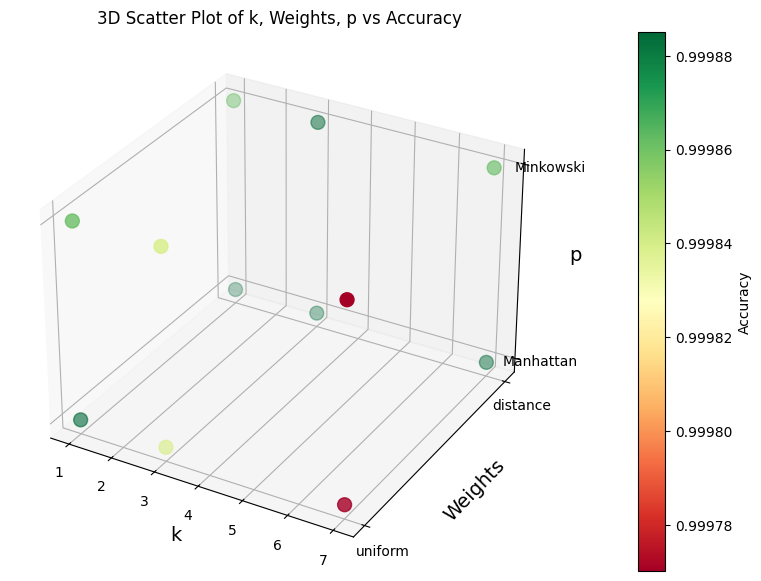

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

# Convert categorical variables to numerical values
weights_map = {'uniform': 0, 'distance': 1}
p_map = {'Manhattan': 0, 'Minkowski': 1}

# Prepare data for plotting
k_values = np.array(df['k'])
weights_values = np.array([weights_map[w] for w in df['weights']])
p_values = np.array([p_map[p] for p in df['p']])
accuracy_values = np.array(df['accuracy'])

# Normalize Accuracy for color mapping
norm = Normalize(vmin=accuracy_values.min(), vmax=accuracy_values.max())

# Use a custom colormap from red to green
cmap = cm.RdYlGn # Reversed RdYlGn colormap (Red to Green)

# Create a 3D scatter plot
fig = plt.figure(figsize=(23, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on accuracy, mapped through the colormap
sc = ax.scatter(k_values, weights_values, p_values, c=accuracy_values, cmap=cmap, norm=norm, s=100)

# Set labels
ax.set_xlabel('k', fontsize=14)
ax.set_ylabel('Weights', fontsize=14)
ax.set_zlabel('p', fontsize=14)

# Custom ticks for 'weights' axis
ax.set_yticks([0, 1])
ax.set_yticklabels(['uniform', 'distance'])

# Custom ticks for 'p' axis
ax.set_zticks([0, 1])
ax.set_zticklabels(['Manhattan', 'Minkowski'])

# Add a colorbar to reflect the accuracy
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label('Accuracy')

plt.title('3D Scatter Plot of k, Weights, p vs Accuracy')
plt.show()

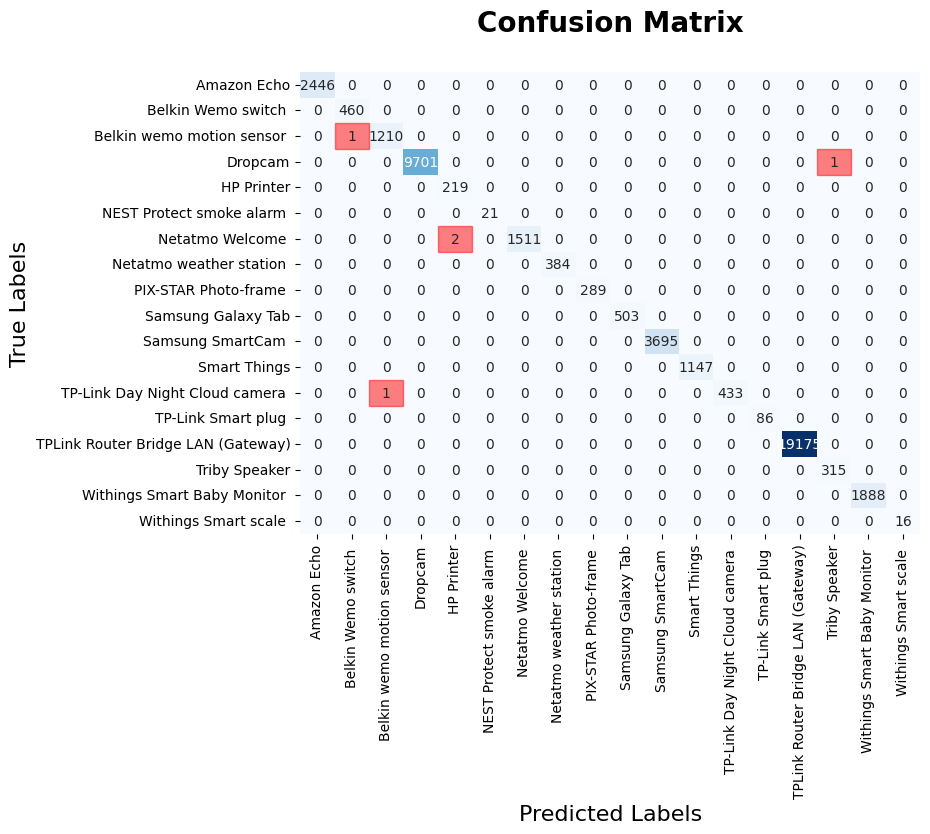

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test is the true labels and y_pred_final is the model predictions
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_final)

# Create a custom colormap with bright red for non-TP values
cmap = sns.color_palette("Blues", as_cmap=True)

# Create a figure
plt.figure(figsize=(8, 6))

# Plot the heatmap with a custom colormap
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False,
            xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)

# Loop over the matrix to manually set non-TP cells to bright red
for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i != j and cm[i, j] != 0: # Non-TP values
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, color='red', alpha=0.5))

plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix\n', fontsize=20, fontweight='bold')
plt.show()
